# Support Vector Machines (SVM)
- **Dataset:** [Breast Cancer Dataset](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset)
- **Goal:** Binary classification using Linear and RBF SVMs


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load and prepare data
df = pd.read_csv('breast-cancer.csv')

# Drop unnecessary columns
df.drop(columns=['id', 'Unnamed: 32'], errors='ignore', inplace=True)

# Convert diagnosis to binary
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Use two features for visualization
X = df[['radius_mean', 'texture_mean']]
# X = df.drop(columns='diagnosis')  # Use this for full feature set
y = df['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# Train SVM with Linear Kernel
svc_linear = SVC(kernel='linear', C=1)
svc_linear.fit(X_train_scaled, y_train)

y_pred_linear = svc_linear.predict(X_test_scaled)
print("Linear Kernel Results:")
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

Linear Kernel Results:
[[67  4]
 [ 7 36]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        71
           1       0.90      0.84      0.87        43

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



In [4]:
# Train SVM with RBF Kernel
svc_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svc_rbf.fit(X_train_scaled, y_train)

y_pred_rbf = svc_rbf.predict(X_test_scaled)
print("RBF Kernel Results:")
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

RBF Kernel Results:
[[67  4]
 [ 5 38]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        71
           1       0.90      0.88      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



In [5]:
# Hyperparameter Tuning with Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Estimator: SVC(C=1)


In [6]:
# Cross-Validation
scores = cross_val_score(grid.best_estimator_, X_train_scaled, y_train, cv=5)
print("Cross-validation Accuracy:", scores.mean())

Cross-validation Accuracy: 0.8989010989010989


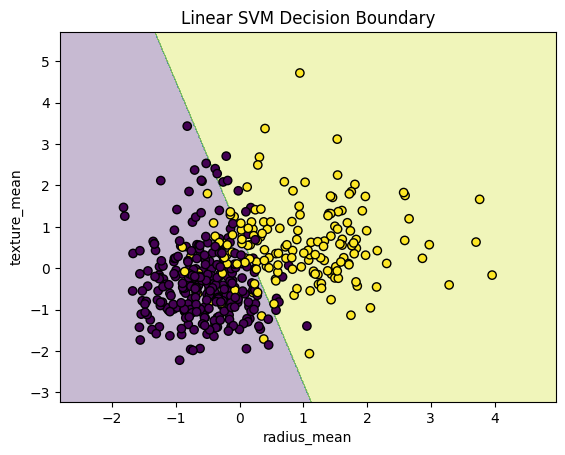

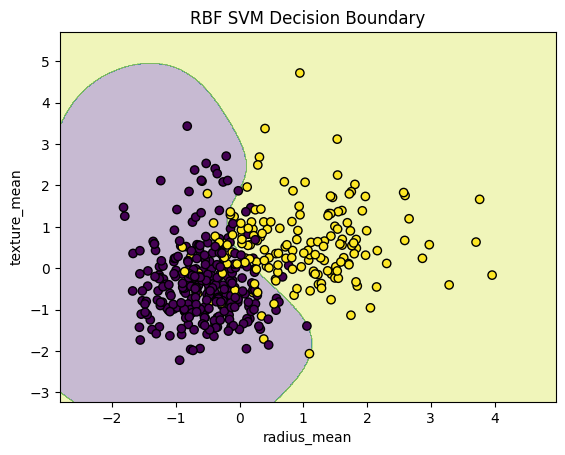

In [7]:
# Visualize Decision Boundary (2D only)
def plot_decision_boundary(model, X, y, title):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.show()

# Plotting (ensure X_train_scaled has 2 features)
plot_decision_boundary(svc_linear, X_train_scaled, y_train, "Linear SVM Decision Boundary")
plot_decision_boundary(svc_rbf, X_train_scaled, y_train, "RBF SVM Decision Boundary")